In [2]:
# assign directory
import os
BRANDON = '/Users/brandonmarks/Desktop/Research Materials/hierarchical-bayesian-model-validation/'
YASH = '/Users/yashd/Desktop/hierarchical-bayesian-model-validation/'

ROOT_DIR = BRANDON
data_dir = ROOT_DIR + 'raw-data/toy-syntheticMRI-2D/coronal-slice'
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)

In [3]:
from PIL import ImageFilter
from PIL.ExifTags import TAGS
import rembg
os.chdir(ROOT_DIR + "testing-framework/")
from utilities import *
from plot_utilities import *
os.chdir(ROOT_DIR + "dataset-preparation/")
from transform_utilities import *

In [4]:
coeffs, mags = convert_fourier_list(data_dir, c = 3)
real_data = np.real(coeffs)
imag_data = np.imag(coeffs)

In [5]:
n= len(real_data)
n

34225000

/Users/brandonmarks/opt/anaconda3/envs/Research/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/brandonmarks/opt/anaconda3/envs/Research/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


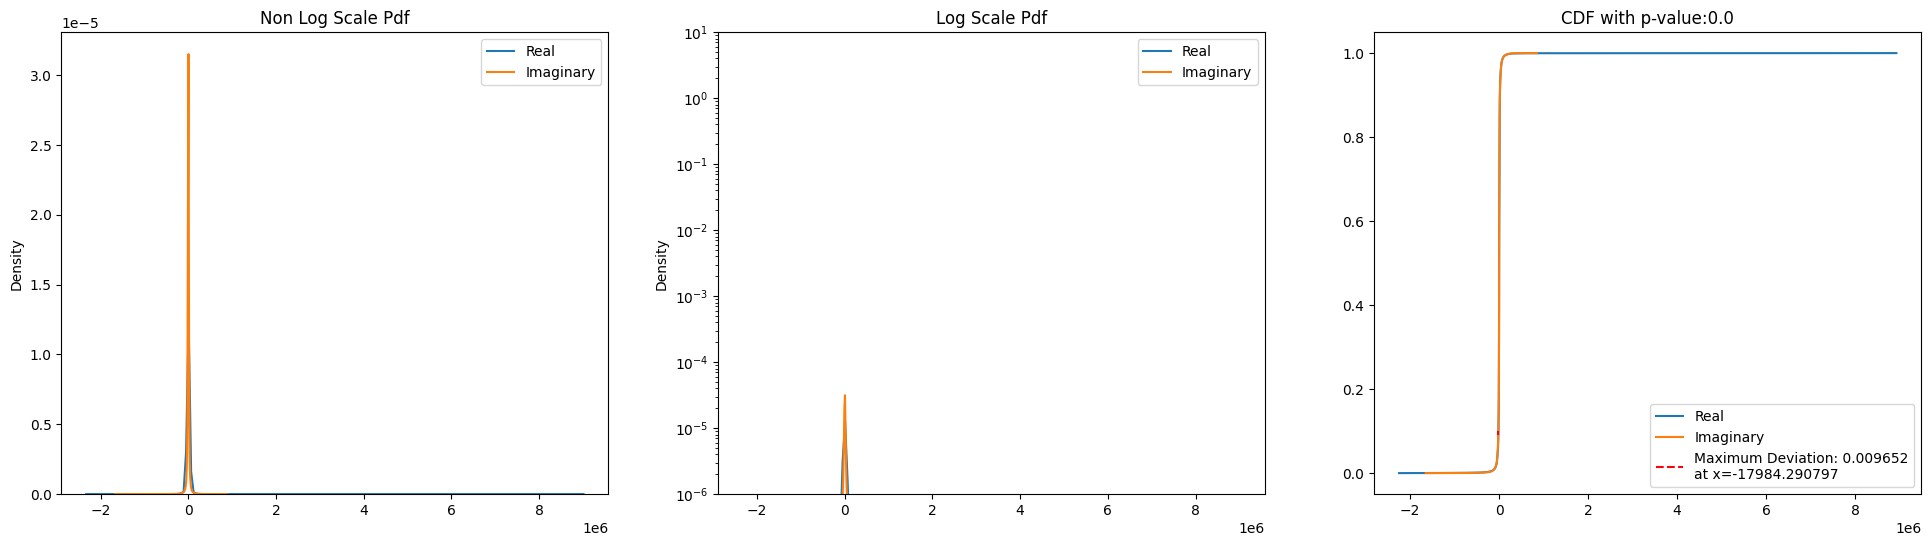

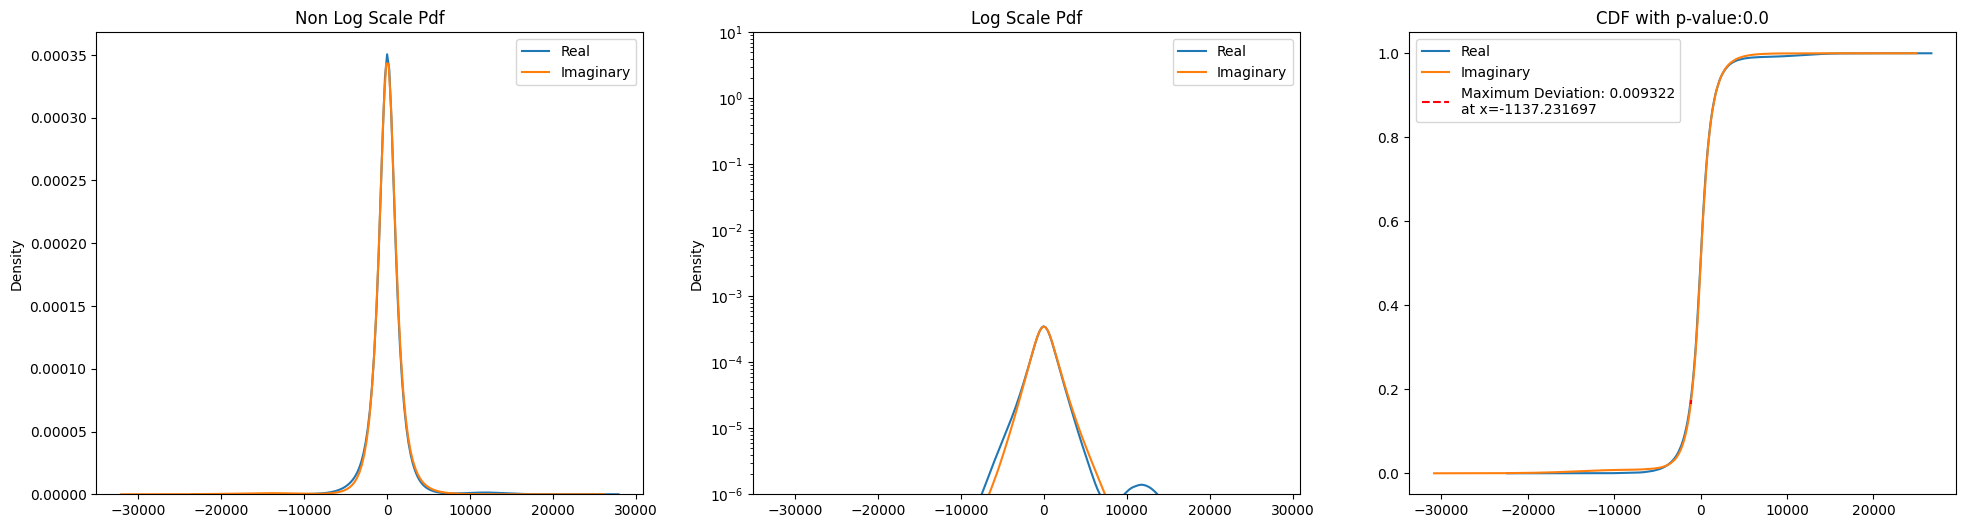

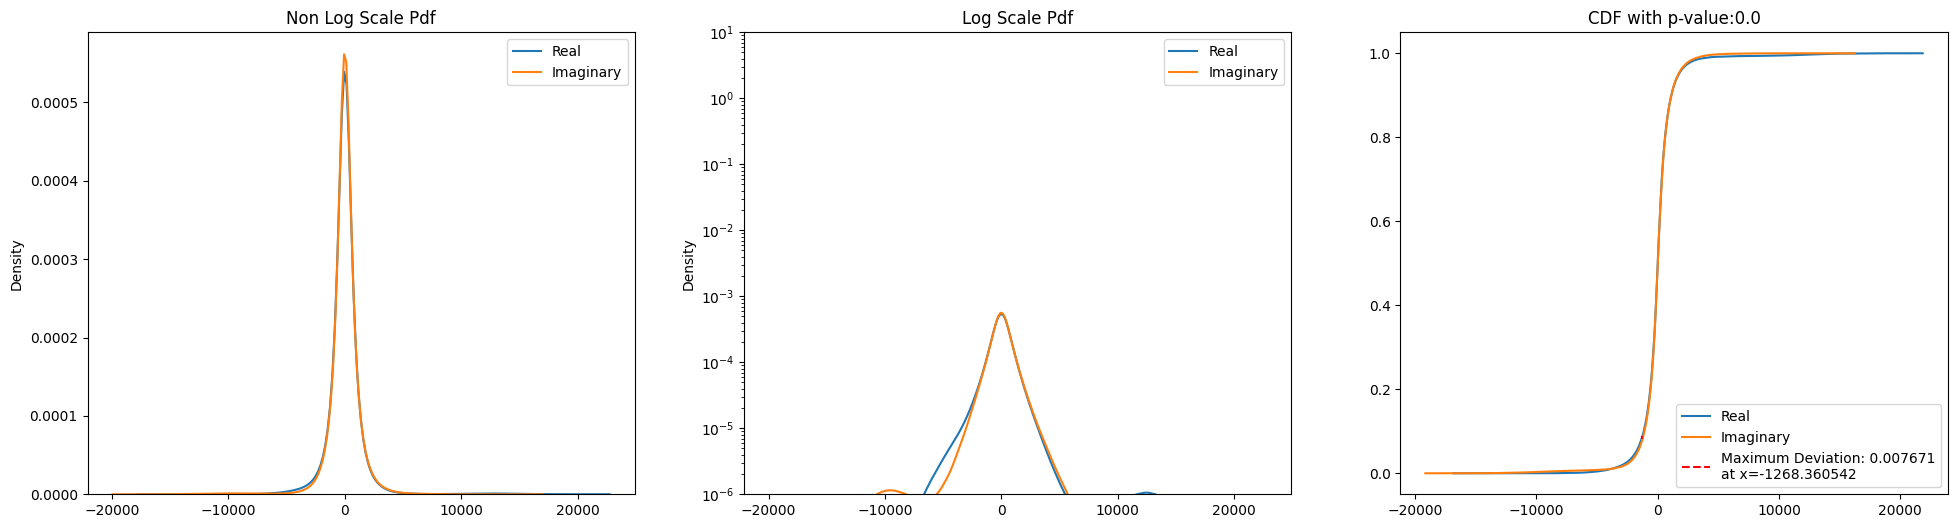

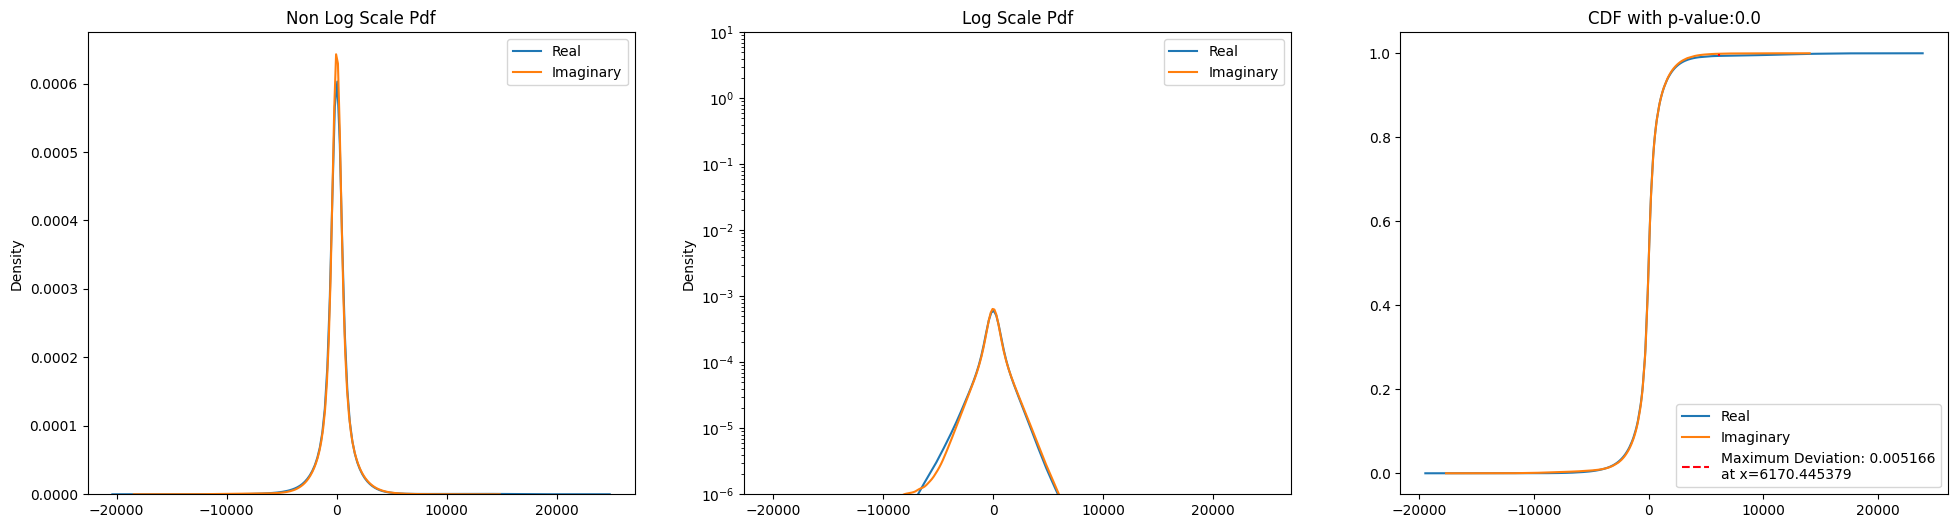

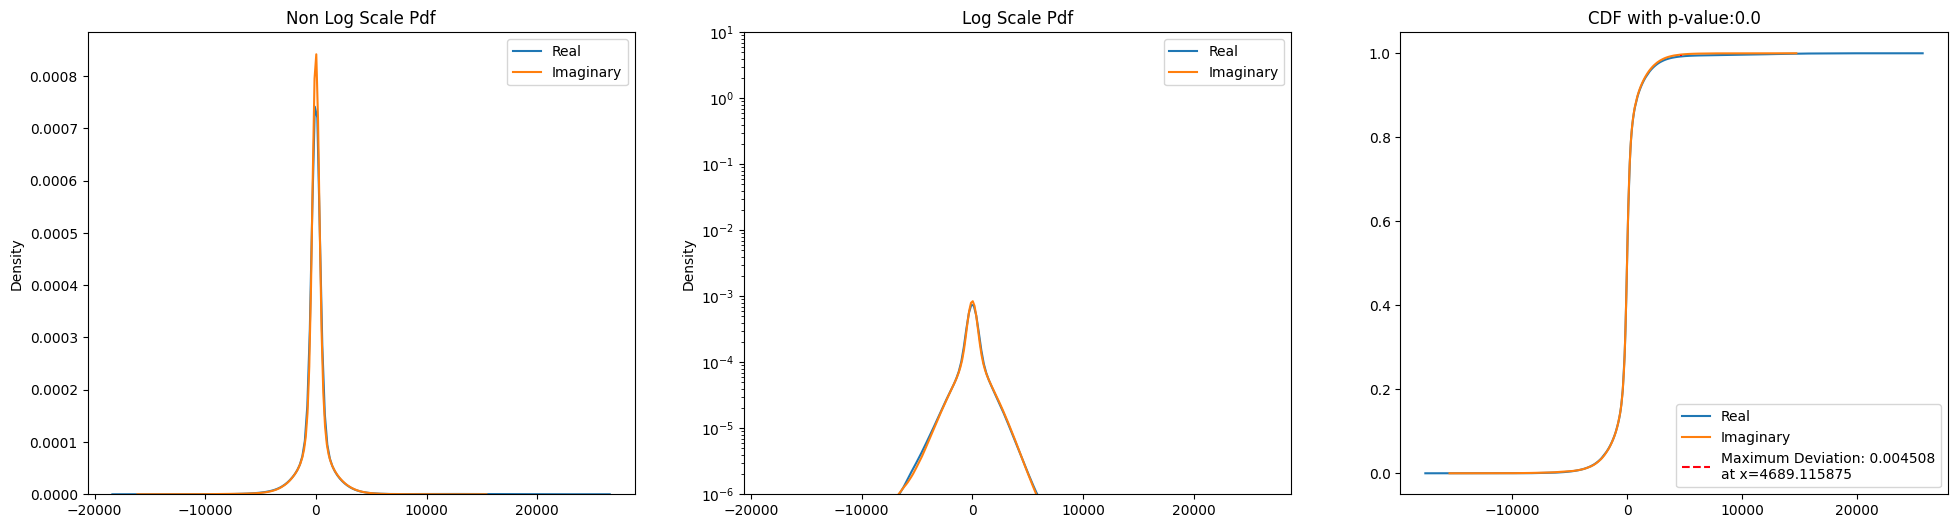

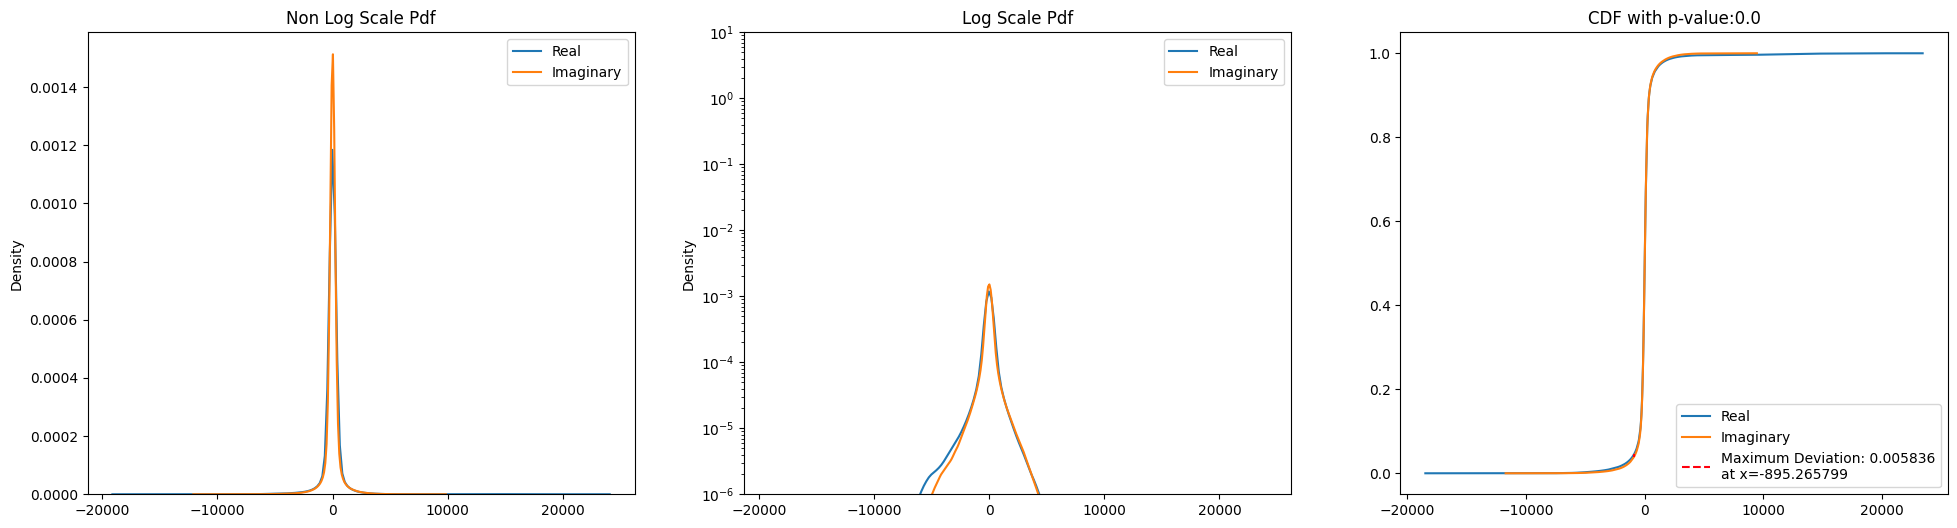

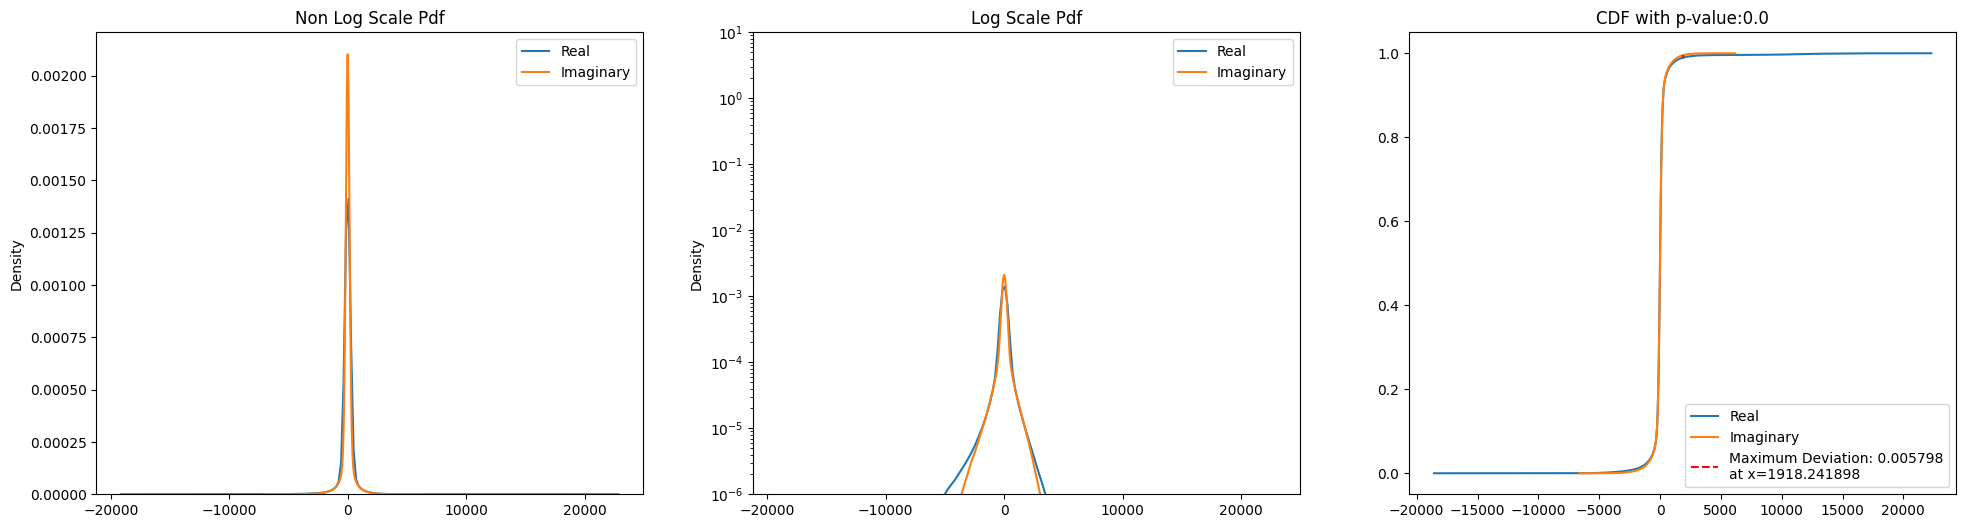

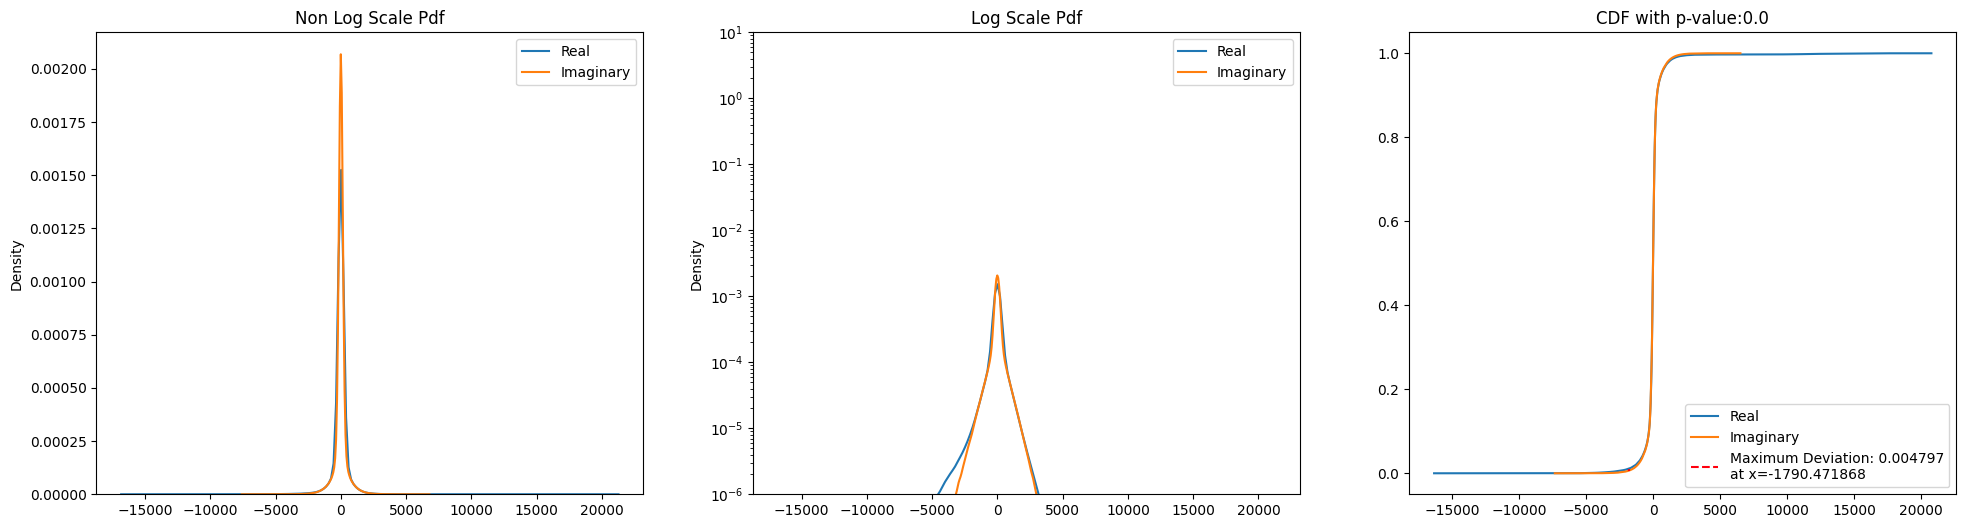

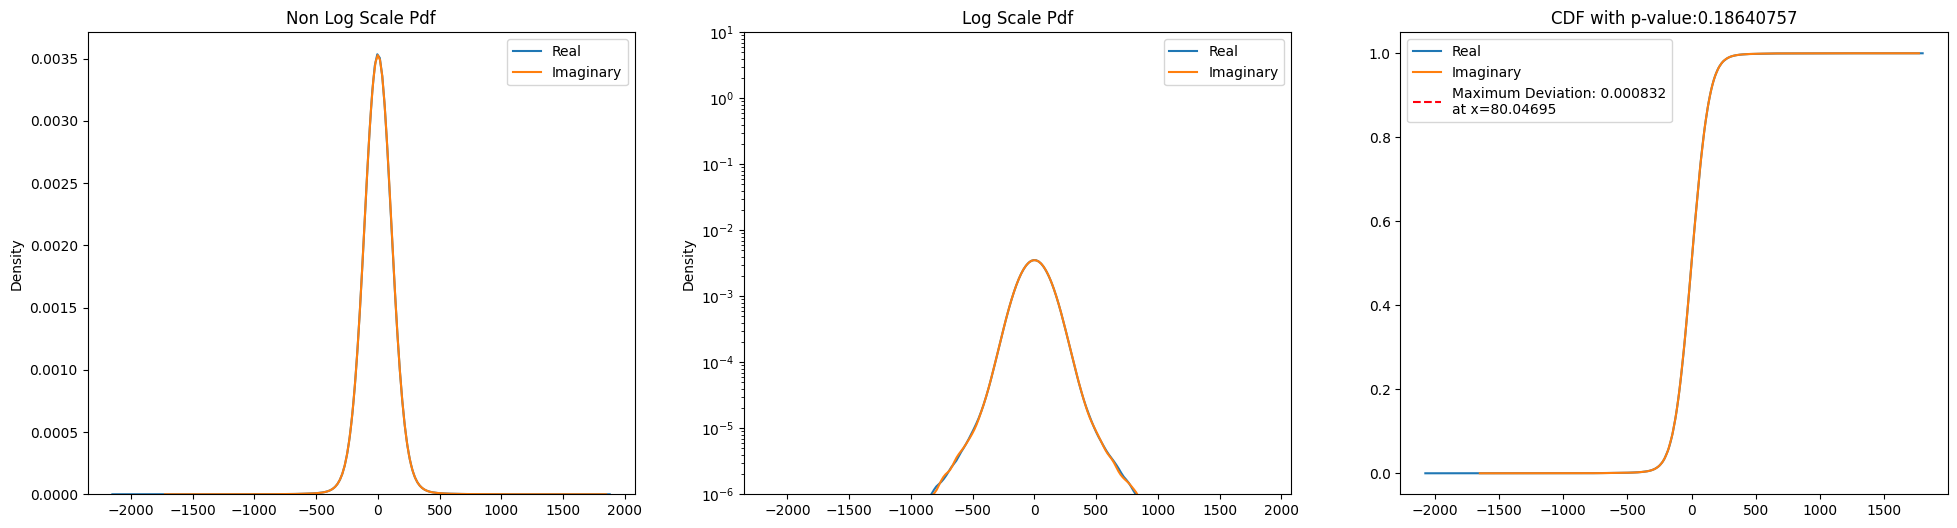

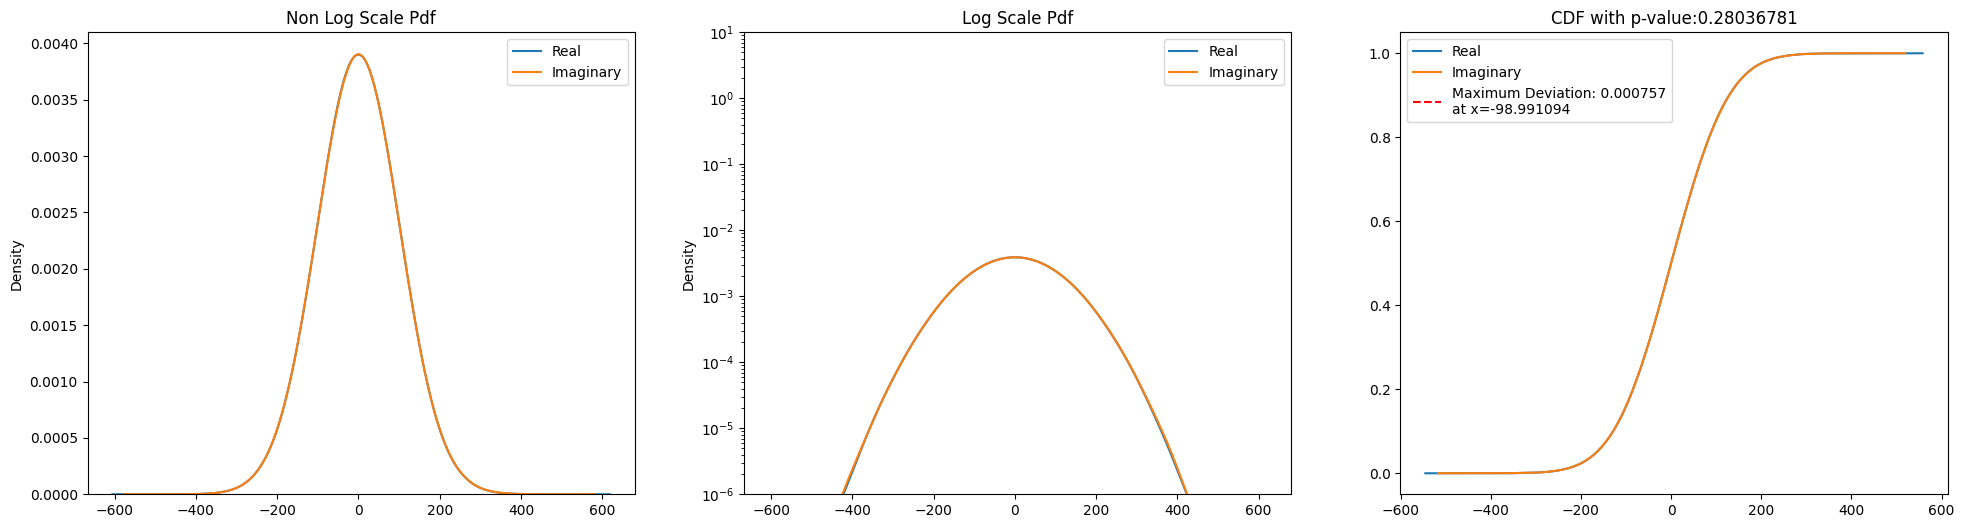

In [6]:

for i in range(10):
    twoSampleComparisonPlots(real_data[n//10 * i: n//10 * (i+1)], imag_data[n//10 * i: n//10 * (i+1)], samp1name="Real", samp2name="Imaginary")


In [7]:
n = len(file_list)
converted_003 = convert_to_fourier_basis(data_dir, "Gray", threshold =0.03, presplit= 2, max_depth = 9)
converted_003["number_of_coefficents"] = converted_003["data"].apply(lambda x:len(x))/(2 *n)
converted_003 = converted_003[converted_003["unique_magnitudes"] > 0]
converted_003

Both Endpoints Are The Same 0.0 and 0.0 Recursion Depth of 9
Both Endpoints Are The Same 0.0027100271002710027 and 0.0027100271002710027 Recursion Depth of 9
Both Endpoints Are The Same 0.0038325570796018836 and 0.0038325570796018836 Recursion Depth of 9
Both Endpoints Are The Same 0.005420054200542005 and 0.005420054200542005 Recursion Depth of 9
Both Endpoints Are The Same 0.006059804817072601 and 0.006059804817072601 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.007665114159203767 and 0.008130081300813007
Both Endpoints Are The Same 0.008569858157637883 and 0.008569858157637883 Recursion Depth of 9
Recursion Depth Exceeded Endpoints are 0.00977114166792409 and 0.01084010840108401
Recursion Depth Exceeded Endpoints are 0.011173727982703687 and 0.012119609634145202
Recursion Depth Exceeded Endpoints are 0.013550135501355013 and 0.013818481066647115
Recursion Depth Exceeded Endpoints are 0.014593942566760176 and 0.015330228318407534
Recursion Depth Exceeded Endpoints ar

,band,channel,magnitude_endpoints,unique_magnitudes,data,number_of_coefficents
0,1,Gray,"(0.0, 0.0)",1,"[7893848.0, 7835687.0, 7853553.0, 7185685.0, 7...",1.0
2,3,Gray,"(0.0027100271002710027, 0.0038325570796018836)",2,"[-1553960.3406483834, -1409571.0043219705, -10...",3.0
4,5,Gray,"(0.005420054200542005, 0.006059804817072601)",2,"[-676395.3652976735, -780822.5999467982, -7435...",4.0
5,6,Gray,"(0.007665114159203767, 0.008130081300813007)",2,"[219629.57144126075, 140623.27243849513, 10119...",3.0
6,7,Gray,"(0.008569858157637883, 0.008569858157637883)",1,"[-106439.0586472335, 50132.35987094956, 107580...",2.0
...,...,...,...,...,...,...
80,81,Gray,"(0.4269561475290045, 0.42967392075282107)",97,"[252.07202948979523, 100.81452354745399, 145.9...",253.0
81,82,Gray,"(0.4298020961772576, 0.4407440641542166)",377,"[-417.950111922823, -100.17887036097139, -8.40...",1029.0
82,83,Gray,"(0.4407607271308829, 0.4848222576665858)",1590,"[-148.16688672326808, 188.45010794299816, 186....",4371.0
83,84,Gray,"(0.4848449796270741, 0.5068620130334431)",815,"[-720.8636764553, -81.15368042243517, -351.634...",2252.0


In [13]:
"0.09890670780972716"
filtered_003 = converted_003[converted_003["magnitude_endpoints"].apply(lambda x: x[0] > 0.09890670780972716)]
filtered_003

,band,channel,magnitude_endpoints,unique_magnitudes,data,number_of_coefficents
55,56,Gray,"(0.09924028955881059, 0.10460845022015601)",58,"[-15571.076687392, 1277.8091001804569, 3963.56...",126.0
56,57,Gray,"(0.10467863369012448, 0.11004845801759866)",55,"[-804.2024595213338, 836.2300785134012, 7753.8...",127.0
57,58,Gray,"(0.11031508095960771, 0.11555016588253574)",55,"[-23145.08850692349, -8711.57527529983, 4530.2...",134.0
58,59,Gray,"(0.11577240847313727, 0.12119609634145202)",62,"[-1877.1202066814903, -8021.983747813086, 1468...",145.0
59,60,Gray,"(0.12134749689559952, 0.12670644691122993)",61,"[-5582.239584586113, -12703.701390965876, 631....",146.0
60,61,Gray,"(0.12688021583435907, 0.13223710459355936)",61,"[-7069.01463268417, 4474.025435471145, -5975.1...",153.0
61,62,Gray,"(0.13232038607841412, 0.1376789788171332)",65,"[-1713.0387376086255, 1956.89375722923, -2042....",161.0
62,63,Gray,"(0.13797205486566783, 0.1431961497411697)",68,"[861.3322637496253, 169.69703553671025, 1538.3...",168.0
63,64,Gray,"(0.14332431243552685, 0.14855794117794846)",68,"[-278.9179536729747, 2820.1510130139573, 1648....",171.0
64,65,Gray,"(0.148829595856325, 0.15430504981557464)",73,"[7298.921472677981, 2924.4539401410448, -3671....",186.0


 
0.06118 x - 5.757


/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_27560/3674162930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_003["magnitude_length"] = filtered_003["magnitude_endpoints"].apply(lambda x: x[1] - x[0])


1.063094894470526

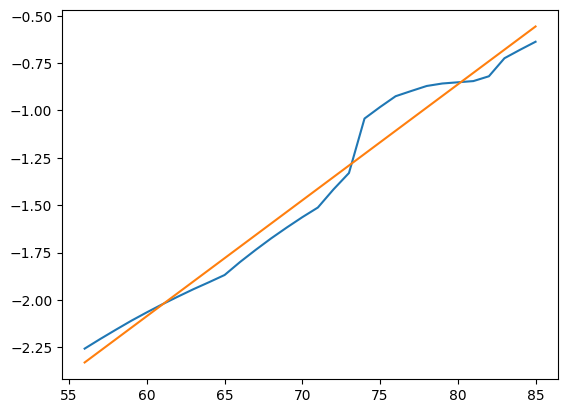

In [14]:

filtered_003["magnitude_length"] = filtered_003["magnitude_endpoints"].apply(lambda x: x[1] - x[0])
x = np.asfarray(filtered_003["band"].to_numpy())
y = np.asfarray(filtered_003["magnitude_endpoints"].apply(lambda x: x[1]).to_numpy())
logy = np.log(y)
plt.plot(x, logy)
print(np.poly1d(np.polyfit(x, logy, 1)))
plt.plot(x, np.poly1d(np.polyfit(x, logy, 1))(x))
np.exp(np.polyfit(x, logy, 1)[0])

In [15]:
splits = getSplits(0.09890670780972716,0.5288928769850599, 1.066)
splits

[0.09890670780972716,
 0.10543455052516916,
 0.11239323085983033,
 0.11981118409657913,
 0.12771872224695335,
 0.13614815791525228,
 0.14513393633765895,
 0.15471277613594445,
 0.1649238193609168,
 0.17580879143873732,
 0.18741217167369398,
 0.1997813750041578,
 0.21296694575443223,
 0.22702276417422476,
 0.2420062666097236,
 0.25797868020596537,
 0.2750052730995591,
 0.29315562112413,
 0.31250389211832263,
 0.33312914899813195,
 0.3551156728320087,
 0.3785533072389213,
 0.4035378255166901,
 0.43017132200079167,
 0.45856262925284397,
 0.4888277627835317,
 0.5210903951272448]

In [16]:
converted_with_splits = convert_to_fourier_basis(data_dir, "Gray", split_list = splits)
converted_with_splits

[0.09890671 0.10543455 0.11239323 0.11981118 0.12771872 0.13614816
 0.14513394 0.15471278 0.16492382 0.17580879 0.18741217 0.19978138
 0.21296695 0.22702276 0.24200627 0.25797868 0.27500527 0.29315562
 0.31250389 0.33312915 0.35511567 0.37855331 0.40353783 0.43017132
 0.45856263 0.48882776 0.5210904 ]


,band,channel,magnitude_endpoints,unique_magnitudes,data
0,1,Gray,"(0.0, 0.09864647546450567)",470,"[7893848.0, 7835687.0, 7853553.0, 7185685.0, 7..."
1,2,Gray,"(0.09890670780972716, 0.10541273896355949)",64,"[10601.347654057496, 18432.64220423276, 7274.1..."
2,3,Gray,"(0.10544756887991176, 0.11229457645041009)",72,"[-12929.453998616944, -3987.731651157528, 1217..."
3,4,Gray,"(0.11242530359182408, 0.11979423363306418)",81,"[13075.838762499945, 15788.450388472149, -8437..."
4,5,Gray,"(0.11997801420693037, 0.12771676604821874)",86,"[-9859.518331772837, -3038.7475709868513, 4673..."
5,6,Gray,"(0.12783172265659354, 0.13609625506221917)",97,"[-6187.788843125709, 4345.865475703209, 3654.9..."
6,7,Gray,"(0.13617717643795244, 0.14508139636123765)",111,"[-2437.9948299926555, -6193.253791296358, 4454..."
7,8,Gray,"(0.14525846377514792, 0.1546853462637435)",122,"[221.86848370098278, 7229.961027694544, -35.81..."
8,9,Gray,"(0.15485143227275502, 0.16486678779680358)",135,"[-685.8789083509959, -1974.3954717909064, 5330..."
9,10,Gray,"(0.16497811658779862, 0.17573433969510543)",159,"[1374.378335150985, -1287.4766015066498, 1792...."
